In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

**RNG**

In [111]:
eps = 1e-3
k_sz = 101
np.random.seed(359)

alpha = np.random.rand(1)
beta = np.random.rand(1)

x = np.linspace(0, 1, k_sz)
yk = alpha * x + beta 
yk_noise = yk + np.random.randn(k_sz)

alpha, beta

(array([0.87894558]), array([0.70002342]))

In [112]:
def linear_appr(x, a, b):
    return np.array(list(map(lambda v: a * v + b, x)))

def rational_appr(x, a, b):
    return np.array(list(map(lambda v: a / (1 + b * v), x)))

def obj_func(params, vals, x, func_name):
    a, b = params
    if func_name == 'rational':
        return sum((vals - rational_appr(x, a, b)) ** 2)
    return sum((vals - linear_appr(x, a, b)) ** 2)

def obj_func_vect(params, vals, x, func_name):
    a, b = params
    if func_name == 'rational':
        return (vals - rational_appr(x, a, b))
    return (vals - linear_appr(x, a, b))

def opt_results(results):
    print('a = {:.4f}, b = {:.4f}, iterations = {}, f-calculations = {}'
        .format(*results))

In [132]:
def gradient_descent(args, eps):
    y, x, func = args
    a, b = 0, 0
    lr = 1e-1
    iters = 0
    f_calc = 0
    finished = False
    while not finished:
        prev_a, prev_b = a, b
        if func == 'linear':
            a = a - lr * (-2) / len(x) * sum(x * (y - a * x - b))
            b = b - lr * (-2) / len(x) * sum(y - a * x - b)
        else:
            a = a - lr * (-2 / len(x)) * sum((-a + b * x * y + y) / (b * x + 1) ** 2)
            b = b - lr * (-2) / len(x) * sum(a * x * (a - y * (b * x + 1)) / (b * x + 1) ** 3)
        iters += 1
        f_calc += 1
        finished = ((a - prev_a) ** 2 + (b - prev_b) ** 2) ** 0.5 < eps
    return a, b, iters, f_calc

**Linear approximation**

In [133]:
args_lin = (yk_noise, x, 'linear')

grad_desc_lin = gradient_descent(args_lin, eps)
conj_grad_lin = optimize.minimize(obj_func, [0, 0], args = args_lin, method='CG', tol=eps)
newton_lin = optimize.minimize(obj_func, [0, 0], args = args_lin, method='BFGS', tol=eps)
LM_lin = optimize.least_squares(obj_func_vect, [0, 0], args = args_lin, method='lm', xtol=eps)

**Gradient Descent linear**

In [134]:
opt_results(grad_desc_lin)

a = 0.7668, b = 0.8533, iterations = 107, f-calculations = 107


Results for 𝜀 =
0.001 are a bit off, what if we increase the precision?

In [135]:
opt_results(gradient_descent(args_lin, 1e-5))

a = 0.8278, b = 0.8209, iterations = 434, f-calculations = 434


Much better

**Conjugate Gradient Descent linear**

In [117]:
print(conj_grad_lin)

     fun: 109.72561388547057
     jac: array([-3.81469727e-06, -4.76837158e-06])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 3
    njev: 6
  status: 0
 success: True
       x: array([0.82846135, 0.82061898])


**Newton’s method linear**

In [118]:
print(newton_lin)

      fun: 109.72561388547058
 hess_inv: array([[ 0.05824118, -0.0291206 ],
       [-0.0291206 ,  0.0195108 ]])
      jac: array([-2.86102295e-06, -4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.82846139, 0.82061895])


**Levenberg-Marquardt algorithm linear**

In [119]:
print(LM_lin)

 active_mask: array([0, 0])
        cost: 54.862806942735226
         fun: array([-7.63923616e-01, -1.90172712e+00,  1.30785124e+00, -4.44201980e-01,
       -1.69420382e+00,  7.87366721e-01, -4.46900370e-01, -4.16294011e-01,
        6.26207894e-01, -1.45552277e+00, -5.80938345e-01,  2.71924123e+00,
        1.94851498e+00,  7.30763243e-02, -2.12460062e-01, -1.66764384e+00,
        7.50325396e-01, -1.18277539e+00,  8.25813922e-01,  1.08880326e+00,
        6.59806645e-01, -1.10399547e+00, -9.04157864e-01,  2.02161415e+00,
       -1.22332500e-01,  7.74754014e-01,  1.57315663e+00,  7.83142770e-01,
       -1.78697273e-01,  1.39648154e+00, -6.69943364e-01, -2.84827254e+00,
       -6.54813444e-02,  1.69419759e+00,  2.77147466e-02,  4.63503389e-01,
       -9.31138621e-01,  5.73033292e-01,  6.76930626e-01, -9.44338368e-02,
       -3.39883199e-01,  5.37296904e-02, -2.28178182e-03, -6.48427828e-01,
       -1.25260474e+00,  1.23797501e-01, -6.69478018e-02, -2.24753579e-02,
        5.51071988e-01, -

**Plot for results of linear approximation**

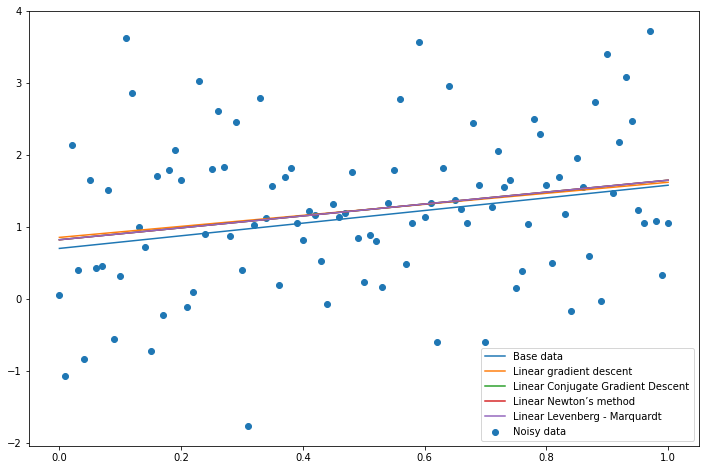

In [120]:
plt.figure(figsize=(12, 8))
plt.plot(x, yk)
plt.plot(x, linear_appr(x, *grad_desc_lin[0:2]))
plt.plot(x, linear_appr(x, *conj_grad_lin.x))
plt.plot(x, linear_appr(x, *newton_lin.x))
plt.plot(x, linear_appr(x, *LM_lin.x))
plt.scatter(x, yk_noise)
plt.legend(['Base data', 'Linear gradient descent', 'Linear Conjugate Gradient Descent', 
            'Linear Newton’s method', 'Linear Levenberg - Marquardt', 'Noisy data'])
plt.show()

**Rational Approximation**

In [138]:
args_rat = (yk_noise, x, 'rational')

grad_desc_rat = gradient_descent(args_rat, eps)
conj_grad_rat = optimize.minimize(obj_func, [0, 0], args = args_rat, method='CG', tol=eps)
newton_rat = optimize.minimize(obj_func, [0, 0], args = args_rat, method='BFGS', tol=eps)
LM_rat = optimize.least_squares(obj_func_vect, [0, 0], args = args_rat, method='lm', xtol=eps)

**Gradient Descent rational**

In [139]:
opt_results(grad_desc_rat)

a = 0.9239, b = -0.4610, iterations = 50, f-calculations = 50


Let's try better precision again

In [140]:
opt_results(gradient_descent(args_rat, 1e-5))

a = 0.9138, b = -0.4708, iterations = 120, f-calculations = 120


**Conjugate Gradient Descent rational**

In [124]:
print(conj_grad_rat)

     fun: 109.95049136476702
     jac: array([0.00026798, 0.0001812 ])
 message: 'Optimization terminated successfully.'
    nfev: 106
     nit: 9
    njev: 25
  status: 0
 success: True
       x: array([ 0.91368627, -0.4708475 ])


**Newton rational**

In [125]:
print(newton_rat)

      fun: 109.95049136443383
 hess_inv: array([[0.01012468, 0.00864942],
       [0.00864942, 0.0099714 ]])
      jac: array([ 0.0003252 , -0.00057507])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 10
     njev: 16
   status: 0
  success: True
        x: array([ 0.9136803 , -0.47085453])


**Levenberg-Marquardt algorithm rational**

In [126]:
print(LM_rat)

 active_mask: array([0, 0])
        cost: 54.9752456819721
         fun: array([-0.85698549, -1.99082682,  1.22267262, -0.52550121, -1.77166594,
        0.71369883, -0.51681755, -0.48250464,  0.56365902, -1.51445534,
       -0.63630075,  2.66740216,  1.90015173,  0.02814066, -0.25401711,
       -1.70587199,  0.71537569, -1.21449791,  0.79726655,  1.0633782 ,
        0.63745022, -1.12333775, -0.92054139,  2.00813314, -0.13296813,
        0.76690571,  1.56803666,  0.78069119, -0.17854139,  1.39918298,
       -0.66475931, -2.84066985, -0.05552505,  1.70644137,  0.04217875,
        0.48011925, -0.91244044,  0.59374306,  0.69958003, -0.06991798,
       -0.31357536,  0.08175374,  0.02738139, -0.61720402, -1.21990015,
        0.15790157, -0.03152701,  0.01417788,  0.58887188, -0.34338826,
       -0.95910079, -0.31210803, -0.41064309, -1.04946742,  0.11224746,
        0.55272946,  1.54388532, -0.7655355 , -0.20457226,  2.3052859 ,
       -0.1312422 ,  0.04868252, -1.89326162,  0.5256936 ,  1.6

**Plot for results of rational approximation**

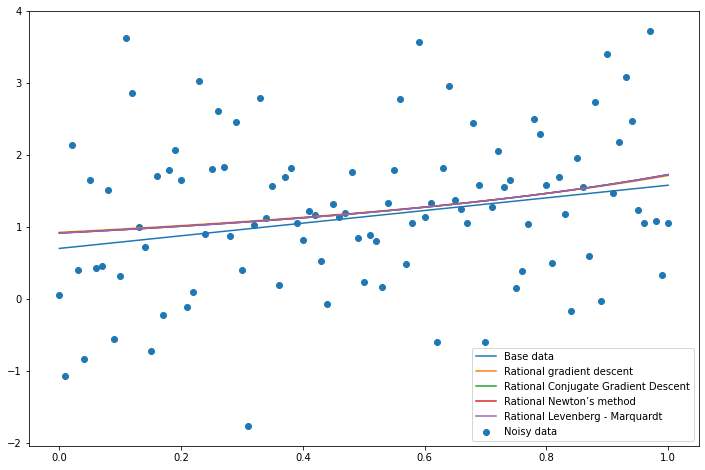

In [127]:
plt.figure(figsize=(12, 8))
plt.plot(x, yk)
plt.plot(x, rational_appr(x, *grad_desc_rat[0:2]))
plt.plot(x, rational_appr(x, *conj_grad_rat.x))
plt.plot(x, rational_appr(x, *newton_rat.x))
plt.plot(x, rational_appr(x, *LM_rat.x))
plt.scatter(x, yk_noise)
plt.legend(['Base data', 'Rational gradient descent', 'Rational Conjugate Gradient Descent', 
            'Rational Newton’s method', 'Rational Levenberg - Marquardt', 'Noisy data'])
plt.show()